# CIA Component 2

Name: Purusharth Malik

Registration No.: 2348542

### Question 1

Failed to converge
The values after the thrid iteration were:
s:49.7295792041870
d:99.9831350223721


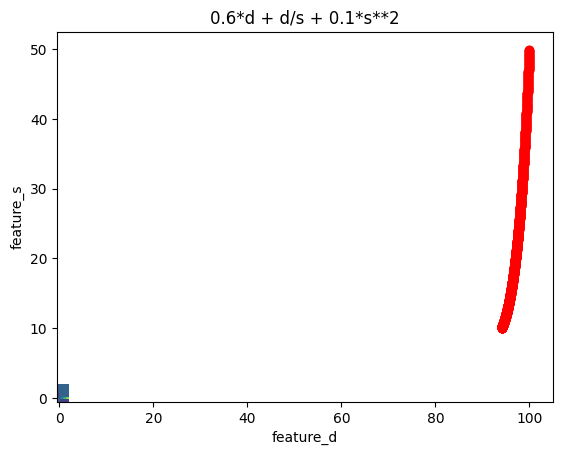

In [75]:
import numpy as np
import sympy as sp
import random
import matplotlib.pyplot as plt

# Creating the symbols
d, s = sp.symbols("d s")

# Creating the function
f_d_s = 0.1*(s**2) + d/s + 0.6*d

# Calculating the gradient of the function
grad_f = sp.lambdify((d, s), sp.derive_by_array(f_d_s, (d, s)))

# Gradient Descent parameters
alpha = 0.01
max_iter = 1000
momentum = 0.9
initial_s, initial_d = 50, 100
starting_point = sp.Matrix([initial_d, initial_s])
prev_grad = sp.Matrix([0,0])

# Values to plot the graph
d_descent, s_descent = [], []

for i in range(max_iter):
    # Computing the gradient at the current point
    grad = sp.Matrix(grad_f(starting_point[0], starting_point[1]))
    # Updating the values of d and s
    starting_point -= alpha*(momentum*grad + alpha*prev_grad)
    # Keeping track of the starting points for every iteration
    d_descent.append(starting_point[0])
    s_descent.append(starting_point[1])
    # Updating the value of the prev_grad
    prev_grad = grad
    
    # Checking for convergence
    if grad.norm() < 0.02:
        print(f"Number of iterations taken to converge: {i}")
        minimum_ds = starting_point
        # Evaluate f_d_s at the minimum
        minimum_cost = f_d_s.subs({d:minimum_ds[0], s:minimum_ds[1]})
        print(f"Minimum value of d and s: {minimum_ds}")
        print(f"Minimum cost: {minimum_cost}")
        break
else:
    print("Failed to converge")
    
# Printing the value after the third iteration
print(f'The values after the thrid iteration were:\ns:{s_descent[2]}\nd:{d_descent[2]}')

# Plotting
feature_d = np.linspace(-0.5, 2.0, 70) 
feature_s = np.linspace(-0.5, 2.0, 70) 
  
# Creating 2-D grid of features 
[D, S] = np.meshgrid(feature_d, feature_s) 
  
fig, ax = plt.subplots(1, 1) 
  
func = 0.1*(S**2) + D/S + 0.6*D
  
# plots filled contour plot 
ax.contourf(D, S, func) 
ax.scatter(d_descent, s_descent, c='r')
  
ax.set_title(f_d_s) 
ax.set_xlabel('feature_d') 
ax.set_ylabel('feature_s') 
  
plt.show() 

### Question 2

### Data Preprocessing

In [18]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('GME_stock.csv')
df

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...,...
4768,2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838
4769,2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017
4770,2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336
4771,2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003


In [20]:
# Checking for missing values
df.isna().sum()

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

There are no missing values and no categorical variables. We will proceed by dropping the `date` feature and scaling the numerical (all) features.

In [28]:
df.drop('date', inplace=True, axis=1)

In [30]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
df

,open_price,high_price,low_price,close_price,volume,adjclose_price
0,16.455242,28.337343,6.570575,11.742172,8.465412,16.037784
1,22.568477,21.982661,16.605972,22.347605,13.747883,30.005731
2,4.447901,7.792593,4.218586,8.598647,26.761441,11.897585
3,5.003898,8.358962,2.819135,3.693177,26.652373,5.436809
4,1.319487,3.273982,1.438763,2.881456,29.541052,4.367727
...,...,...,...,...,...,...
4768,-0.925594,-0.852551,-0.967897,-0.917716,-0.255876,-0.928782
4769,-0.905179,-0.851009,-0.978905,-0.940110,-0.236109,-0.948641
4770,-0.898373,-0.843297,-0.944047,-0.912548,-0.198715,-0.924199
4771,-0.886464,-0.832808,-0.938543,-0.909102,-0.098201,-0.921143


For anomaly detection, since we have multivariate data, we will use Hotelling's T2 on the multidimensional space of PCA.

In [34]:
from pca import pca

# Instantiating PCA
model = pca(normalize=True, detect_outliers=['ht2'], n_std=2)

# Getting the results
results = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]


In [37]:
# Looking at the p-values of outliers
outliers = results['outliers'][results['outliers']['y_bool']]
outliers

,y_proba,p_raw,y_score,y_bool
0,2.388153e-298,2.501731e-301,1397.423597,True
1,8.623688e-302,5.420294e-305,1414.321950,True
2,0.000000e+00,0.000000e+00,2763.102112,True
3,0.000000e+00,0.000000e+00,1453.638363,True
4,9.563799e-302,8.014916e-305,1413.538534,True
5,6.487987e-04,1.495241e-06,32.523428,True
7,2.306379e-07,3.865709e-10,49.858141,True
9,2.123054e-12,3.113634e-15,74.083336,True
10,2.585578e-296,3.250255e-299,1387.675776,True
75,6.040898e-07,1.139076e-09,47.608112,True


In [40]:
# Removing the outliers
df = df.drop(outliers.index)
df

,open_price,high_price,low_price,close_price,volume,adjclose_price
6,0.964248,1.079457,0.979373,1.097461,4.593941,2.018106
8,1.040468,1.052311,0.828934,0.848019,6.622614,1.689576
11,-0.220561,-0.203201,-0.249091,-0.223481,0.559464,0.278352
12,-0.257991,-0.187777,-0.271841,-0.224170,1.761187,0.277444
13,-0.341696,-0.332763,-0.413474,-0.379210,0.468390,0.073248
...,...,...,...,...,...,...
4768,-0.925594,-0.852551,-0.967897,-0.917716,-0.255876,-0.928782
4769,-0.905179,-0.851009,-0.978905,-0.940110,-0.236109,-0.948641
4770,-0.898373,-0.843297,-0.944047,-0.912548,-0.198715,-0.924199
4771,-0.886464,-0.832808,-0.938543,-0.909102,-0.098201,-0.921143


### Splitting the dataset

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop('close_price', axis=1).values
y = df['close_price']

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Splitting the training set into training and validation set
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.9)

X_train.shape, X_val.shape, X_test.shape

((3429, 5), (380, 5), (953, 5))

### Building the neural network

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import *

class MyModel(tf.keras.models.Model):
    
    def __init__(self):
        super().__init__()
        self.dense_1 = Dense(128, activation=tf.nn.relu)
        self.dense_2 = Dense(128, activation=tf.nn.relu)
        self.dense_3 = Dense(128, activation=tf.nn.relu)
        self.dropout_1 = Dropout(0.2)
        self.dropout_2 = Dropout(0.2)
        self.regression = Dense(1)
        
    def call(self, input_tensor):
        x = self.dense_1(input_tensor)
        x = self.dropout_1(x)
        x = self.dense_2(x)
        x = self.dropout_2(x)
        x = self.dense_3(x)
        return self.regression(x)
    
model = MyModel()

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.MeanSquaredError())

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    batch_size=16)

Epoch 1/100
215/215 [==============================] - 2s 3ms/step - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 2/100
215/215 [==============================] - 1s 3ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 3/100
215/215 [==============================] - 1s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 4/100
215/215 [==============================] - 1s 3ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 5/100
215/215 [==============================] - 1s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 6/100
215/215 [==============================] - 1s 2ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 7/100
215/215 [=

215/215 [==============================] - 1s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 52/100
215/215 [==============================] - 1s 3ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 53/100
215/215 [==============================] - 1s 3ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 54/100
215/215 [==============================] - 1s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 55/100
215/215 [==============================] - 1s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 56/100
215/215 [==============================] - 1s 3ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 57/100
215/215 [=======

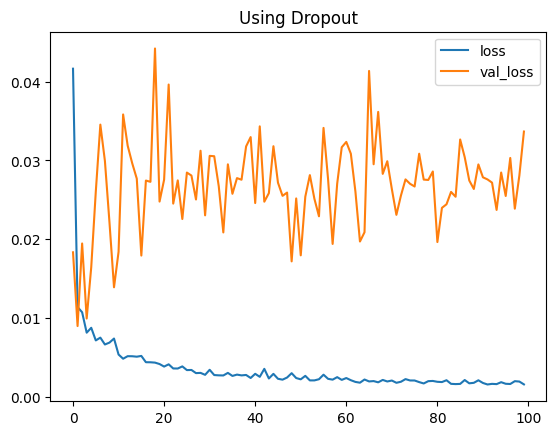

In [56]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Using Dropout')
plt.show()

### Implementing Regularization Techniques

In [57]:
import tensorflow as tf
from tensorflow.keras.layers import *

class L1Model(tf.keras.models.Model):
    
    def __init__(self):
        super().__init__()
        self.dense_1 = Dense(128, activation=tf.nn.relu, kernel_regularizer='l1')
        self.dense_2 = Dense(128, activation=tf.nn.relu, kernel_regularizer='l1')
        self.dense_3 = Dense(128, activation=tf.nn.relu, kernel_regularizer='l1')
        self.regression = Dense(1)
        
    def call(self, input_tensor):
        x = self.dense_1(input_tensor)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return self.regression(x)
    
l1_model = L1Model()

l1_model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.MeanSquaredError())

l1_history = l1_model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    batch_size=16)

Epoch 1/100
215/215 [==============================] - 2s 3ms/step - loss: 7.2121 - mean_squared_error: 0.0405 - val_loss: 0.3964 - val_mean_squared_error: 0.0085
Epoch 2/100
215/215 [==============================] - 0s 2ms/step - loss: 0.2543 - mean_squared_error: 0.0082 - val_loss: 0.1849 - val_mean_squared_error: 0.0072
Epoch 3/100
215/215 [==============================] - 1s 2ms/step - loss: 0.1620 - mean_squared_error: 0.0055 - val_loss: 0.1463 - val_mean_squared_error: 0.0043
Epoch 4/100
215/215 [==============================] - 0s 2ms/step - loss: 0.1372 - mean_squared_error: 0.0038 - val_loss: 0.1292 - val_mean_squared_error: 0.0031
Epoch 5/100
215/215 [==============================] - 0s 2ms/step - loss: 0.1230 - mean_squared_error: 0.0031 - val_loss: 0.1167 - val_mean_squared_error: 0.0027
Epoch 6/100
215/215 [==============================] - 0s 2ms/step - loss: 0.1113 - mean_squared_error: 0.0027 - val_loss: 0.1056 - val_mean_squared_error: 0.0030
Epoch 7/100
215/215 [=

215/215 [==============================] - 0s 2ms/step - loss: 0.0620 - mean_squared_error: 7.9881e-04 - val_loss: 0.0621 - val_mean_squared_error: 8.5215e-04
Epoch 50/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0621 - mean_squared_error: 9.2395e-04 - val_loss: 0.0623 - val_mean_squared_error: 0.0011
Epoch 51/100
215/215 [==============================] - 1s 2ms/step - loss: 0.0618 - mean_squared_error: 8.0311e-04 - val_loss: 0.0618 - val_mean_squared_error: 8.5392e-04
Epoch 52/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0618 - mean_squared_error: 8.5788e-04 - val_loss: 0.0617 - val_mean_squared_error: 7.3052e-04
Epoch 53/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0618 - mean_squared_error: 8.5138e-04 - val_loss: 0.0618 - val_mean_squared_error: 0.0011
Epoch 54/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0617 - mean_squared_error: 8.3620e-04 - val_loss: 0.0618 - val_mean_squared_error: 

Epoch 97/100
215/215 [==============================] - 1s 2ms/step - loss: 0.0594 - mean_squared_error: 8.4257e-04 - val_loss: 0.0596 - val_mean_squared_error: 7.3995e-04
Epoch 98/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0594 - mean_squared_error: 8.5987e-04 - val_loss: 0.0605 - val_mean_squared_error: 0.0018
Epoch 99/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0594 - mean_squared_error: 8.8091e-04 - val_loss: 0.0592 - val_mean_squared_error: 8.2234e-04
Epoch 100/100
215/215 [==============================] - 1s 2ms/step - loss: 0.0592 - mean_squared_error: 8.2429e-04 - val_loss: 0.0593 - val_mean_squared_error: 8.8268e-04


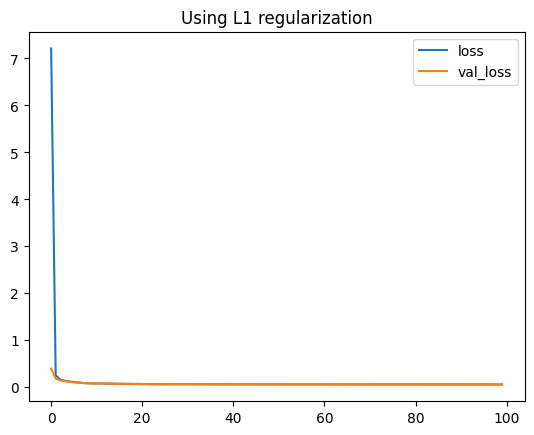

In [58]:
plt.plot(l1_history.history['loss'], label='loss')
plt.plot(l1_history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Using L1 regularization')
plt.show()

In [59]:
import tensorflow as tf
from tensorflow.keras.layers import *

class L2Model(tf.keras.models.Model):
    
    def __init__(self):
        super().__init__()
        self.dense_1 = Dense(128, activation=tf.nn.relu, kernel_regularizer='l2')
        self.dense_2 = Dense(128, activation=tf.nn.relu, kernel_regularizer='l2')
        self.dense_3 = Dense(128, activation=tf.nn.relu, kernel_regularizer='l2')
        self.regression = Dense(1)
        
    def call(self, input_tensor):
        x = self.dense_1(input_tensor)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return self.regression(x)
    
l2_model = L2Model()

l2_model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.MeanSquaredError())

l2_history = l2_model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    batch_size=16)

Epoch 1/100
215/215 [==============================] - 2s 4ms/step - loss: 0.9309 - mean_squared_error: 0.0213 - val_loss: 0.2177 - val_mean_squared_error: 0.0020
Epoch 2/100
215/215 [==============================] - 1s 2ms/step - loss: 0.1151 - mean_squared_error: 0.0022 - val_loss: 0.0603 - val_mean_squared_error: 0.0025
Epoch 3/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0435 - mean_squared_error: 0.0027 - val_loss: 0.0318 - val_mean_squared_error: 0.0019
Epoch 4/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0274 - mean_squared_error: 0.0024 - val_loss: 0.0236 - val_mean_squared_error: 0.0021
Epoch 5/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0216 - mean_squared_error: 0.0019 - val_loss: 0.0216 - val_mean_squared_error: 0.0039
Epoch 6/100
215/215 [==============================] - 1s 2ms/step - loss: 0.0196 - mean_squared_error: 0.0027 - val_loss: 0.0178 - val_mean_squared_error: 0.0018
Epoch 7/100
215/215 [=

Epoch 51/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0085 - mean_squared_error: 0.0020 - val_loss: 0.0076 - val_mean_squared_error: 0.0012
Epoch 52/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0014 - val_loss: 0.0089 - val_mean_squared_error: 0.0025
Epoch 53/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0017 - val_loss: 0.0072 - val_mean_squared_error: 8.4011e-04
Epoch 54/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_squared_error: 0.0013 - val_loss: 0.0072 - val_mean_squared_error: 8.2325e-04
Epoch 55/100
215/215 [==============================] - 1s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0017 - val_loss: 0.0090 - val_mean_squared_error: 0.0026
Epoch 56/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_squared_error: 0.0014 - val_loss: 0.0073 - val_mean_squared_error: 0.0010
Epoch 57

215/215 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0018 - val_loss: 0.0069 - val_mean_squared_error: 0.0015


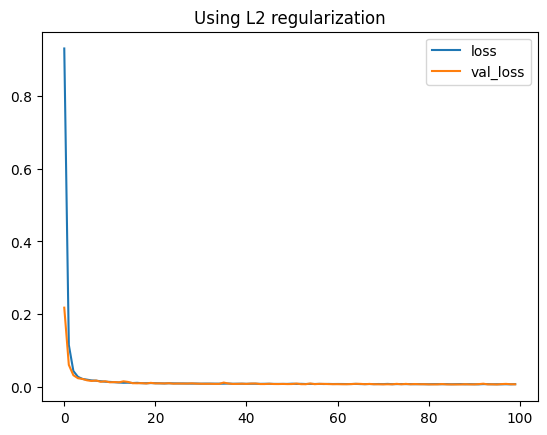

In [60]:
plt.plot(l2_history.history['loss'], label='loss')
plt.plot(l2_history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Using L2 regularization')
plt.show()

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import *

class ElasticModel(tf.keras.models.Model):
    
    def __init__(self):
        super().__init__()
        self.dense_1 = Dense(128, activation=tf.nn.relu, kernel_regularizer='l1_l2')
        self.dense_2 = Dense(128, activation=tf.nn.relu, kernel_regularizer='l1_l2')
        self.dense_3 = Dense(128, activation=tf.nn.relu, kernel_regularizer='l1_l2')
        self.regression = Dense(1)
        
    def call(self, input_tensor):
        x = self.dense_1(input_tensor)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return self.regression(x)
    
elastic_model = ElasticModel()

elastic_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=tf.keras.metrics.MeanSquaredError())

elastic_history = elastic_model.fit(X_train, y_train, epochs=100,
                                    validation_data=(X_val, y_val),
                                    batch_size=16)

Epoch 1/100
215/215 [==============================] - 2s 3ms/step - loss: 7.6227 - mean_squared_error: 0.0392 - val_loss: 0.3149 - val_mean_squared_error: 0.0098
Epoch 2/100
215/215 [==============================] - 0s 2ms/step - loss: 0.2195 - mean_squared_error: 0.0088 - val_loss: 0.1720 - val_mean_squared_error: 0.0069
Epoch 3/100
215/215 [==============================] - 0s 2ms/step - loss: 0.1479 - mean_squared_error: 0.0039 - val_loss: 0.1317 - val_mean_squared_error: 0.0024
Epoch 4/100
215/215 [==============================] - 0s 2ms/step - loss: 0.1243 - mean_squared_error: 0.0021 - val_loss: 0.1174 - val_mean_squared_error: 0.0014
Epoch 5/100
215/215 [==============================] - 0s 2ms/step - loss: 0.1128 - mean_squared_error: 0.0014 - val_loss: 0.1090 - val_mean_squared_error: 0.0014
Epoch 6/100
215/215 [==============================] - 0s 2ms/step - loss: 0.1068 - mean_squared_error: 0.0013 - val_loss: 0.1044 - val_mean_squared_error: 0.0010
Epoch 7/100
215/215 [=

215/215 [==============================] - 0s 2ms/step - loss: 0.0686 - mean_squared_error: 0.0010 - val_loss: 0.0683 - val_mean_squared_error: 8.4879e-04
Epoch 51/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0685 - mean_squared_error: 0.0011 - val_loss: 0.0681 - val_mean_squared_error: 7.9372e-04
Epoch 52/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0684 - mean_squared_error: 0.0011 - val_loss: 0.0686 - val_mean_squared_error: 0.0013
Epoch 53/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0682 - mean_squared_error: 0.0010 - val_loss: 0.0680 - val_mean_squared_error: 8.7712e-04
Epoch 54/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0682 - mean_squared_error: 0.0011 - val_loss: 0.0680 - val_mean_squared_error: 8.9879e-04
Epoch 55/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0681 - mean_squared_error: 0.0011 - val_loss: 0.0676 - val_mean_squared_error: 7.7041e-04
Epoch 56/

Epoch 99/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0648 - mean_squared_error: 9.8291e-04 - val_loss: 0.0644 - val_mean_squared_error: 8.4214e-04
Epoch 100/100
215/215 [==============================] - 0s 2ms/step - loss: 0.0648 - mean_squared_error: 0.0010 - val_loss: 0.0642 - val_mean_squared_error: 7.6755e-04


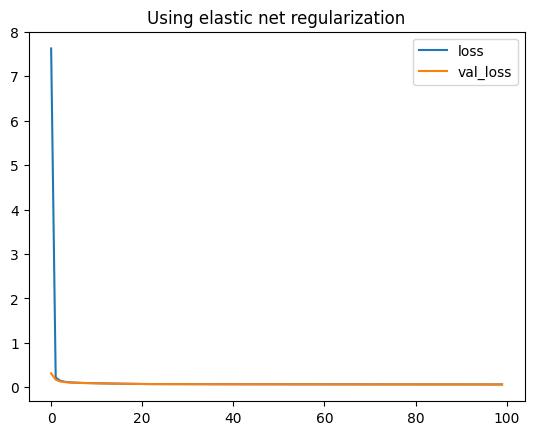

In [63]:
plt.plot(elastic_history.history['loss'], label='loss')
plt.plot(elastic_history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Using elastic net regularization')
plt.show()

### Comparing Regularization Techniques

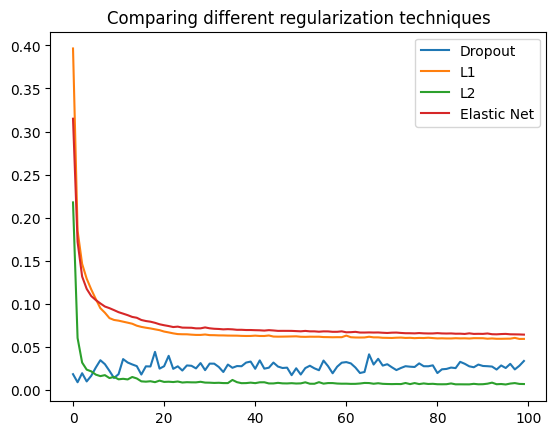

In [64]:
plt.plot(history.history['val_loss'], label='Dropout')
plt.plot(l1_history.history['val_loss'], label='L1')
plt.plot(l2_history.history['val_loss'], label='L2')
plt.plot(elastic_history.history['val_loss'], label='Elastic Net')
plt.legend()
plt.title('Comparing different regularization techniques')
plt.show()

L2 regularization appears to obtain the best results. This makes sense as with L2 regularization, the network becomes less sensitive to small changes in the input data which is usually the case with stock markets.

### Looking at the predictions

We will use the model created with L2 regularization.

30/30 [==============================] - 0s 2ms/step


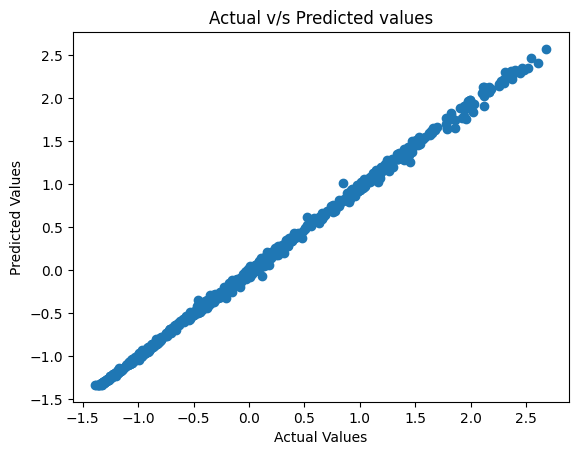

In [74]:
# Predicting the values
y_pred = l2_model.predict(X_test)

# Plotting the predictions
plt.scatter(y_test, y_pred)
plt.title("Actual v/s Predicted values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Wonderful! We get a linear curve which signifies that the predictions are very close to the actual values.

# End